<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Исследования оттока клиентов банка


Мы будем изучать исторические данные о поведении клиентов банка и расторжении договора с банком с целью прогнозирования возможного ухода клиента из банка. Эти данные актуальны для принятия мер по сохранению текущих клиентов.

## Подготовка данных

Скачаем и изучим файл с историческими данными по клиентам, приведем датафрейм в подходящий для исследования вид.

1.1. Импортируем необходимые для исследования инструменты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

1.2. Скачаем и посмотрим файл

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
#Проверим на дубликаты
data.duplicated().sum()

0

In [6]:
data.isna().sum() #посмотрим, есть ли пропущенные значения

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

В столбце "Tenure" есть пропущенные значения

In [7]:
data.dtypes  #посмотрим типы данных

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

1.3. Приведем датафрейм в подходящий для исследования вид

удалю ненужные для исследования столбцы:


In [8]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

удалю строки с пропущенными значениями (их менее 10 %, соответственно такие строки можно удалить без ущерба для информативности)

In [9]:
data = data.dropna(subset=['Tenure'])
print(data.head())
print(data['Tenure'].dtype)

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   
3          699    France  Female   39     1.0       0.00              2   
4          850     Spain  Female   43     2.0  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
float64


изменю формат столбца 'Tenure' на int, как более подходящий по смыслу

In [10]:
data['Tenure'] = data['Tenure'].astype('int')
print(data['Tenure'].dtype)

int64


подготовим данные методом OHE, чтобы в дальнейшем не попасть в дамми-ловушку при использовании разных моделей 


In [11]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Вывод:

1. Для нашего исследования у нас есть данные о 9999 клиентах;
2. Явных дубликатов нет;
3. Пропущенные значения были в столбце 'Tenure', удалили строки с пропущенными значениями;
4. Изменили формат столбцов на более подходящий;
5. Удалили ненужные для исследования столбцы;
6. Подготовили данные методом OHE, чтобы в дальнейшем не попасть в дамми-ловушку.



## Исследование задачи

Разобьем данные на выборки и исследуем модели.

2.1. Разбиваем данные на выборки

Спрятанной тестовой выборки нет. Значит, данные нужно разбить на три части: обучающую, валидационную и тестовую (обычно делят на 60, 20 и 20% соответственно).

In [12]:
features = data.drop(['Exited'], axis=1)
target = data['Exited']

#разделяю данные на обучающую(60%) и валидационную+тестовую(в совокупности 40%) выборки:
features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target, test_size=0.4,
                                                                              random_state=12345)

#разделим валидационную и тестовую выборки(делим предыдущий результат пополам):
features_test, features_valid, target_test, target_valid = train_test_split(features_valid,
                                                                            target_valid, test_size=0.5,
                                                                            random_state=12345)

print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(1819, 11)
(1819,)
(1818, 11)
(1818,)


2.2. Делаем масштабирование.

In [13]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] #зафиксируем численные признаки
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [14]:
features_train[numeric] = scaler.transform(features_train[numeric])  #масштабируем численные признаки обучающей выборки
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9344,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,0,0,0
3796,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,0,0,1
7462,-0.398853,0.090079,1.385532,-1.237830,-0.908179,1,1,0.848738,0,0,1
1508,-0.749875,-0.286389,0.352020,-1.237830,0.809300,1,1,-0.894953,0,0,1
4478,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,0,1,-1.284516,0,0,1


In [15]:
features_valid[numeric] = scaler.transform(features_valid[numeric])  #масштабируем численные признаки валидационной выборки
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5170,1.707279,-0.756975,-0.336987,-1.237830,0.809300,1,1,0.718362,0,0,0
4180,-0.429826,-0.286389,1.730036,0.485538,0.809300,0,0,1.687305,1,0,1
7349,-0.171721,0.278313,0.352020,-0.269213,0.809300,0,1,0.824128,1,0,1
7469,0.385784,-0.380507,1.041028,0.464813,-0.908179,1,0,-1.118018,0,0,0
3467,-1.142194,0.278313,-1.370498,0.353837,0.809300,0,1,-0.107642,1,0,0


In [16]:
features_test[numeric] = scaler.transform(features_test[numeric])  #масштабируем численные признаки тестовой выборки 
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7445,-1.369326,0.560665,-0.336987,-1.237830,-0.908179,1,0,-0.086537,0,0,0
8620,1.232367,0.090079,1.041028,-1.237830,0.809300,0,1,-0.537457,0,0,0
1714,0.840048,0.560665,0.352020,1.231363,-0.908179,0,0,1.070393,1,0,1
5441,1.056856,-0.945210,-1.370498,0.951231,-0.908179,1,0,-0.576279,0,0,1
9001,0.406433,-0.662858,0.352020,0.767800,-0.908179,1,1,0.662068,0,1,1


2.3. Исследуем модели без учета дисбаланса

А. Дерево решений

In [17]:
best_f1_data = 0
best_depth_data = 0
best_auc_roc = 0
for depth in range(1, 11):
    dat = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    dat.fit(features_train, target_train)
    predicted_valid_data = dat.predict(features_valid)
    f1_data = f1_score(target_valid, predicted_valid_data)
    auc_roc_data = roc_auc_score(target_valid, dat.predict_proba(features_valid)[:, 1])
    print("F1 = {:.2f}, AUC-ROC = {:.2f}".format(f1_data, auc_roc_data), 'при глубине', depth)
    if f1_data > best_f1_data:
        best_f1_data = f1_data
        best_depth_data = depth
        best_auc_roc = auc_roc_data
        
print()
print('F1 для дерева решений :', best_f1_data)
print('Максимальная глубина :', best_depth_data)
print('AUC-ROC :', best_auc_roc)



F1 = 0.00, AUC-ROC = 0.69 при глубине 1
F1 = 0.51, AUC-ROC = 0.74 при глубине 2
F1 = 0.41, AUC-ROC = 0.80 при глубине 3
F1 = 0.53, AUC-ROC = 0.82 при глубине 4
F1 = 0.48, AUC-ROC = 0.83 при глубине 5
F1 = 0.53, AUC-ROC = 0.83 при глубине 6
F1 = 0.55, AUC-ROC = 0.83 при глубине 7
F1 = 0.50, AUC-ROC = 0.80 при глубине 8
F1 = 0.52, AUC-ROC = 0.79 при глубине 9
F1 = 0.52, AUC-ROC = 0.77 при глубине 10

F1 для дерева решений : 0.5534804753820034
Максимальная глубина : 7
AUC-ROC : 0.8280166825807154


Б. Случайный лес

In [18]:
best_f1_rf = 0
best_depth_rf = 0
best_est_rf = 0
best_roc_auc_score_rf = 0
for depth in range(1, 10):
    for est in range(1, 50):
        rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rf.fit(features_train, target_train)
        predicted_valid_rf = rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predicted_valid_rf)
        roc_auc_score_rf = roc_auc_score(target_valid, rf.predict_proba(features_valid)[:,1])
        if f1_rf > best_f1_rf:
            best_f1_rf = f1_rf
            best_depth_rf = depth
            best_est_rf = est
            best_roc_auc_score_rf = roc_auc_score_rf
            
print('F1 для случайного леса :', best_f1_rf)
print('Максимальная глубина :', best_depth_rf)
print('Число деревьев :', best_est_rf)
print('AUC-ROC :', best_roc_auc_score_rf)

F1 для случайного леса : 0.56672760511883
Максимальная глубина : 8
Число деревьев : 18
AUC-ROC : 0.8529444871406723


В.Логистическая регрессия

In [19]:
lr = RobustScaler()
features_train_lr = lr.fit_transform(features_train)
features_valid_lr = lr.transform(features_valid)

lgr = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
lgr.fit(features_train_lr, target_train)
predicted_valid_lgr = lgr.predict(features_valid_lr)
print('F1 для логистической регрессии:', f1_score(target_valid, predicted_valid_lgr))
print('AUC-ROC для логистической регрессии:', roc_auc_score(target_valid, lgr.predict_proba(features_valid)[:, 1]))

F1 для логистической регрессии: 0.32119914346895073
AUC-ROC для логистической регрессии: 0.7750937376277978


Лучшая модель без учета дисбаланса классов по показателям F1 и AUC-ROC - случайный лес.

2.4. Исследуем баланс классов выборки

0    0.796062
1    0.203938
Name: Exited, dtype: float64


Text(0, 0.5, 'доли ответов')

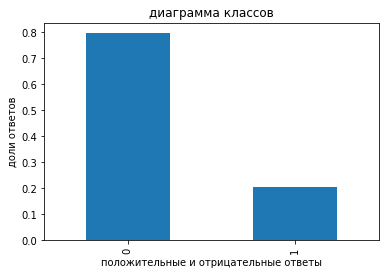

In [20]:
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') #диаграмма классов
plt.title('диаграмма классов')
plt.xlabel('положительные и отрицательные ответы')
plt.ylabel('доли ответов')

Из исследования видно, что положительных ответов в нашей выборке около 20%, а отрицательных - около 80%. Имеется явный дисбаланс.

Вывод:
1. Без учета дисбаланса классов наибольшие значения F1 и AUC-ROC у модели случайного леса(F1 для случайного леса : 0.5656934306569344,AUC-ROC : 0.852991064843926);
2. Имеется явный дисбаланс классов (положительных ответов в нашей выборке около 20%, а отрицательных - около 80%). 

## Борьба с дисбалансом

Для улучшения модели будем бороться с дисбалансом с помощью  увеличения и уменьшения выборки.

3.1. Увеличение выборки

In [21]:
#увеличиваю число наблюдений положительного класса:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Обучаю модели на увеличенной выборке, смотрю по ним F1 и AUC-ROC


А. Случайный лес

In [22]:
best_f1_rf = 0
best_depth_rf = 0
best_est_rf = 0
best_roc_auc_score_rf = 0
for depth in range(1, 10):
    for est in range(1, 50):
        rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rf.fit(features_upsampled, target_upsampled)
        predicted_valid_rf = rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predicted_valid_rf)
        roc_auc_score_rf = roc_auc_score(target_valid, rf.predict_proba(features_valid)[:,1])
        if f1_rf > best_f1_rf:
            best_f1_rf = f1_rf
            best_depth_rf = depth
            best_est_rf = est
            best_roc_auc_score_rf = roc_auc_score_rf
            
print('F1 для случайного леса :', best_f1_rf)
print('Максимальная глубина :', best_depth_rf)
print('Число деревьев :', best_est_rf)
print('AUC-ROC :', best_roc_auc_score_rf)

F1 для случайного леса : 0.5997693194925029
Максимальная глубина : 6
Число деревьев : 9
AUC-ROC : 0.8569889843731806


Б. Дерево решений

In [23]:
best_f1_data = 0
best_depth_data = 0
best_auc_roc = 0
for depth in range(1, 11):
    dat = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    dat.fit(features_upsampled, target_upsampled)
    predicted_valid_data = dat.predict(features_valid)
    f1_data = f1_score(target_valid, predicted_valid_data)
    auc_roc_data = roc_auc_score(target_valid, dat.predict_proba(features_valid)[:, 1])
    print("F1 = {:.2f}, AUC-ROC = {:.2f}".format(f1_data, auc_roc_data), 'при глубине', depth)
    if f1_data > best_f1_data:
        best_f1_data = f1_data
        best_depth_data = depth
        best_auc_roc = auc_roc_data
        
print()
print('F1 для дерева решений :', best_f1_data)
print('Максимальная глубина :', best_depth_data)
print('AUC-ROC :', best_auc_roc)

F1 = 0.47, AUC-ROC = 0.69 при глубине 1
F1 = 0.50, AUC-ROC = 0.74 при глубине 2
F1 = 0.51, AUC-ROC = 0.79 при глубине 3
F1 = 0.51, AUC-ROC = 0.81 при глубине 4
F1 = 0.57, AUC-ROC = 0.84 при глубине 5
F1 = 0.54, AUC-ROC = 0.84 при глубине 6
F1 = 0.54, AUC-ROC = 0.83 при глубине 7
F1 = 0.53, AUC-ROC = 0.80 при глубине 8
F1 = 0.53, AUC-ROC = 0.78 при глубине 9
F1 = 0.50, AUC-ROC = 0.75 при глубине 10

F1 для дерева решений : 0.5653631284916201
Максимальная глубина : 5
AUC-ROC : 0.8374962155616106


В. Логистическая регрессия

In [24]:
modell = LogisticRegression(random_state=12345,solver='liblinear')
modell.fit(features_upsampled,target_upsampled)
predicted_valid = modell.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
print("ROC_auc:", roc_auc_score(target_valid, predicted_valid))

F1: 0.49653808110781406
ROC_auc: 0.7182446804381409


на увеличенной выборке F1 выше

3.2. Уменьшение выборки

делаю объекты частого класса не такими частыми:

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Обучаю модели на уменьшенной выборке, смотрю по ним F1 и AUC-ROC

А. Случайный лес

In [26]:
best_f1_rf = 0
best_depth_rf = 0
best_est_rf = 0
best_roc_auc_score_rf = 0
for depth in range(1, 10):
    for est in range(1, 50):
        rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rf.fit(features_downsampled, target_downsampled)
        predicted_valid_rf = rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predicted_valid_rf)
        roc_auc_score_rf = roc_auc_score(target_valid, rf.predict_proba(features_valid)[:,1])
        if f1_rf > best_f1_rf:
            best_f1_rf = f1_rf
            best_depth_rf = depth
            best_est_rf = est
            best_roc_auc_score_rf = roc_auc_score_rf
            
print('F1 для случайного леса :', best_f1_rf)
print('Максимальная глубина :', best_depth_rf)
print('Число деревьев :', best_est_rf)
print('AUC-ROC :', best_roc_auc_score_rf)

F1 для случайного леса : 0.5834254143646409
Максимальная глубина : 5
Число деревьев : 10
AUC-ROC : 0.8497102478710108


Б. Дерево решений

In [27]:
best_f1_data = 0
best_depth_data = 0
best_auc_roc = 0
for depth in range(1, 11):
    dat = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    dat.fit(features_downsampled, target_downsampled)
    predicted_valid_data = dat.predict(features_valid)
    f1_data = f1_score(target_valid, predicted_valid_data)
    auc_roc_data = roc_auc_score(target_valid, dat.predict_proba(features_valid)[:, 1])
    print("F1 = {:.2f}, AUC-ROC = {:.2f}".format(f1_data, auc_roc_data), 'при глубине', depth)
    if f1_data > best_f1_data:
        best_f1_data = f1_data
        best_depth_data = depth
        best_auc_roc = auc_roc_data
        
print()
print('F1 для дерева решений :', best_f1_data)
print('Максимальная глубина :', best_depth_data)
print('AUC-ROC :', best_auc_roc)

F1 = 0.45, AUC-ROC = 0.68 при глубине 1
F1 = 0.47, AUC-ROC = 0.74 при глубине 2
F1 = 0.47, AUC-ROC = 0.79 при глубине 3
F1 = 0.54, AUC-ROC = 0.82 при глубине 4
F1 = 0.53, AUC-ROC = 0.82 при глубине 5
F1 = 0.55, AUC-ROC = 0.83 при глубине 6
F1 = 0.55, AUC-ROC = 0.83 при глубине 7
F1 = 0.53, AUC-ROC = 0.80 при глубине 8
F1 = 0.51, AUC-ROC = 0.79 при глубине 9
F1 = 0.51, AUC-ROC = 0.77 при глубине 10

F1 для дерева решений : 0.5485148514851486
Максимальная глубина : 6
AUC-ROC : 0.8290210143071178


В. Логистическая регрессия

In [28]:
modell = LogisticRegression(random_state=12345,solver='liblinear')
modell.fit(features_downsampled,target_downsampled)
predicted_valid = modell.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
print("ROC_auc:", roc_auc_score(target_valid, predicted_valid))

F1: 0.4911591355599214
ROC_auc: 0.7140953833733126


уменьшение выборки не дало такого значительного увеличения F1 случайного леса(нашей лучшей модели), как увеличение

Вывод:
1. Исследования сбалансрованной выборки подтвердили, что модель случайного дерева - лучшая;
2. Увеличение выборки дает увеличение F1 нашей лучшей модели с 0,56 до 0,60, а уменьшение выборки - до 0,58;
3. В качестве метода борьбы с дисбалансом нам следует использовать увеличение выборки;
4. Лучшие гиперпараметры: max_depth=6, n_estimators=9, random_state=12345

## Тестирование модели

4.1. Обучим и протестируем лучшую модель


In [29]:
#применяю upsampling к выборке:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [30]:
#тестирую случайный лес на увеличенной выборке с лучшими гиперпараметрами:
model_rf_test = RandomForestClassifier(random_state=12345,max_depth=6, n_estimators=9)
model_rf_test.fit(features_upsampled, target_upsampled)
predictions_rf_test = model_rf_test.predict(features_test)

print('F1 =', f1_score(target_test, predictions_rf_test))
print('AUC-ROC =', roc_auc_score(target_test, model_rf_test.predict_proba(features_test)[:,1]))

F1 = 0.5980498374864572
AUC-ROC = 0.8582751809916853


In [31]:
display(predictions_rf_test)

array([1, 0, 1, ..., 0, 0, 1])

F1 финальной модели случайного леса (RandomForestClassifier) на тестовой выборке - 0.5980498374864572.

4.2. Проверим финальную модель на адекватность

Создадим простейшую (dummy) модель для получения контрольных данных для сравнительной оценки построенной нами более сложной модели и определим ее f1.

In [32]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)


0.34350797266514804

посмотрим f1 нашей лучшей модели

In [33]:
print('F1 =', f1_score(target_test, predictions_rf_test))

F1 = 0.5980498374864572


f1 нашей модели выше, чем простейшей модели. Значит, наша модель адекватна.

Вывод:
1. F1 финальной модели случайного леса (RandomForestClassifier) на тестовой выборке - 0.5980498374864572;
2. Наша модель адекватна.

# Общий вывод:

1. Без учета дисбаланса классов лучшая модель - это модель случайного леса(F1 для случайного леса : 0.5656934306569344,AUC-ROC : 0.852991064843926);
2. Имеется явный дисбаланс классов (положительных ответов в нашей выборке около 20%, а отрицательных - около 80%);
3. Для улучшения качества модели в нашем случае надо использовать увеличение выборки, что дает увеличение F1 до 0,60;
4. F1 финальной модели случайного леса (RandomForestClassifier) на тестовой выборке - 0.5980498374864572, что подтверждает, что upsampling помог справиться с дисбалансом классов и улучшить качество модели;
5. Наша модель адекватна.